# Mental health and substance use disorders -- Pre-Processing and Training Data Development

### Outline:
1.   Problem Identification 

2.   Data Wrangling 
 
3.   Exploratory Data Analysis

4.   **Pre-processing and Training Data Development**

5.   Modeling 

6.   Documentation

## Overview

In this notebook, I will use the gender data frame to identify the country outliers using unsupervised clustering machine learning. Because our data is unlabeled and the data is very clean, there is not that much to do with Pre-Processing and no need for data splitting. Here, I will focus on 2017 for all entities.

**First, let's load the data.**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = os.getcwd()
print ("The current working directory is %s" % path)

The current working directory is C:\Users\yuhan\Desktop\Springboard\Capstone project-2


In [3]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'figures',
 'Mental health and substance disorders data',
 'Mental health and substance use disorders_data wrangling.ipynb',
 'Mental health and substance use disorders_EDA.ipynb',
 'Mental health and substance use disorders_Modeling.ipynb',
 'Mental health and substance use disorders_Pre-Processing and Training Data Development.ipynb',
 'models']

In [4]:
path = 'data'
os.chdir(path)

In [5]:
os.listdir()

['GDP_per_capita_output.csv',
 'mental_substance_age_output.csv',
 'mental_substance_gdp_output.csv',
 'mental_substance_gender_output.csv',
 'mental_substance_output.csv']

In [6]:
df = pd.read_csv('mental_substance_gender_output.csv', index_col=0)
df.head()

,Entity,Code,Year,Male (%),Female (%)
0,Afghanistan,AFG,1990,17.448695,17.634233
1,Afghanistan,AFG,1991,17.771263,17.873184
2,Afghanistan,AFG,1992,18.051575,18.092318
3,Afghanistan,AFG,1993,18.275848,18.265196
4,Afghanistan,AFG,1994,18.427490,18.383394


Let's prepare data for modeling with focucing on 2017 data. 

In [7]:
df_2017 = df[df.Year==2017]
df_2017.head()

,Entity,Code,Year,Male (%),Female (%)
27,Afghanistan,AFG,2017,16.674168,16.963023
55,Albania,ALB,2017,10.646518,11.043173
83,Algeria,DZA,2017,14.063803,15.011597
111,American Samoa,ASM,2017,10.687930,11.004269
139,Andean Latin America,NaN,2017,11.973561,12.787111


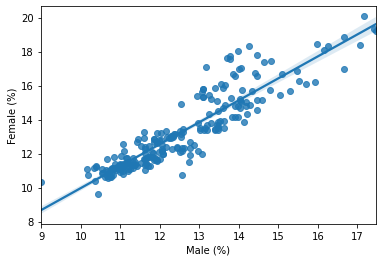

In [8]:
sns.regplot(x='Male (%)', y='Female (%)', data=df_2017)

Mental and substance use disorders rate in males and females are positively correlated.

From the above correlation chart, we can see that some of the data points are obvious outliers such as far away from other data points. 

In [9]:
data = df_2017.drop(columns=['Code', 'Year'])
data = data.reset_index(drop=True)
data.head()

,Entity,Male (%),Female (%)
0,Afghanistan,16.674168,16.963023
1,Albania,10.646518,11.043173
2,Algeria,14.063803,15.011597
3,American Samoa,10.687930,11.004269
4,Andean Latin America,11.973561,12.787111


In [10]:
#specify the Male and Female column names to be modelled
model_data = data[['Male (%)', 'Female (%)']]
model_data.head()

,Male (%),Female (%)
0,16.674168,16.963023
1,10.646518,11.043173
2,14.063803,15.011597
3,10.687930,11.004269
4,11.973561,12.787111


## Next Step: Modeling

**I will use the following methods to detect outliers, and choose a best one for further modeling.:**
     * Isolation Forest
     * One-Class SVM
     * DBSCAN
     * Local Outlier Factor (LOF)
     * Elliptic Envelope